In [1]:
import pandas as pd

# Load the datasets
user_details = pd.read_excel('Data Analyst Intern Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('Data Analyst Intern Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('Data Analyst Intern Assignment.xlsx', sheet_name='OrderDetails.csv')

In [3]:
# Preview data
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00 

Popular Dishes: Caesar Salad and Spaghetti are top choices; focus promotions on these.
    
Demographics: Users aged 27-35 and from metro areas like New York and LA are most active.
    
Cooking Sessions vs. Orders: Users who engage in cooking sessions are more likely to complete orders; incentivize sessions.

Meal Preferences: Dinner is the most preferred meal type; tailor offers accordingly.
    
Cancellations: Investigate canceled orders (e.g., Grilled Chicken) to improve service.

In [5]:
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


There is an 2 missing value in rating column

In [7]:
# Fill missing ratings with 0 for simplicity
order_details['Rating'] = order_details['Rating'].fillna(0)

# Standardize data types if needed (example for User ID)
user_details['User ID'] = user_details['User ID'].astype(str)

Handle the missing value inrating columns and then standardize the user id columns

In [9]:
# Merge UserDetails with OrderDetails
merged_data = pd.merge(order_details, user_details, on='User ID')

# Merge with CookingSessions
final_data = pd.merge(merged_data, cooking_sessions, on='Session ID')

# Preview the combined data
print(final_data.head())

   Order ID User ID_x Order Date Meal Type_x      Dish Name_x Order Status  \
0      1001      U001 2024-12-01      Dinner        Spaghetti    Completed   
1      1004      U001 2024-12-02   Breakfast         Pancakes    Completed   
2      1009      U001 2024-12-05      Dinner  Grilled Chicken    Completed   
3      1002      U002 2024-12-01       Lunch     Caesar Salad    Completed   
4      1006      U002 2024-12-03      Dinner        Spaghetti    Completed   

   Amount (USD) Time of Day  Rating Session ID  ...            Email  \
0          15.0       Night     5.0       S001  ...  alice@email.com   
1           8.0     Morning     4.0       S004  ...  alice@email.com   
2          12.0       Night     5.0       S009  ...  alice@email.com   
3          10.0         Day     4.0       S002  ...    bob@email.com   
4          14.0       Night     4.0       S006  ...    bob@email.com   

   Favorite Meal Total Orders User ID_y      Dish Name_y Meal Type_y  \
0         Dinner          

Top Dishes: Spaghetti, Grilled Chicken, and Caesar Salad dominate completed orders; focus on these for promotions.
                                                                                                  
Active Users: Alice and Bob are highly engaged, with frequent sessions and completed orders.
                                                                                                  
Session Quality: High session ratings (4.0–4.9) suggest users value the cooking experience; maintain and highlight this satisfaction.
    
Dinner Preference: Dinner sessions and orders generate the most revenue; tailor campaigns toward evening meal plans.

In [15]:
# Popular dishes
popular_dishes = final_data['Dish Name_x'].value_counts()
print(popular_dishes)

# Demographic factors
location_analysis = final_data.groupby('Location')['Amount (USD)'].sum()
age_analysis = final_data.groupby('Age')['Total Orders'].mean()

# Relationship between cooking sessions and orders
sessions_vs_orders = final_data.groupby('User ID_x').agg({'Order ID': 'count', 'Session ID': 'count'})
print(sessions_vs_orders)

Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
           Order ID  Session ID
User ID_x                      
U001              3           3
U002              3           3
U003              3           3
U004              2           2
U005              2           2
U006              1           1
U007              1           1
U008              1           1


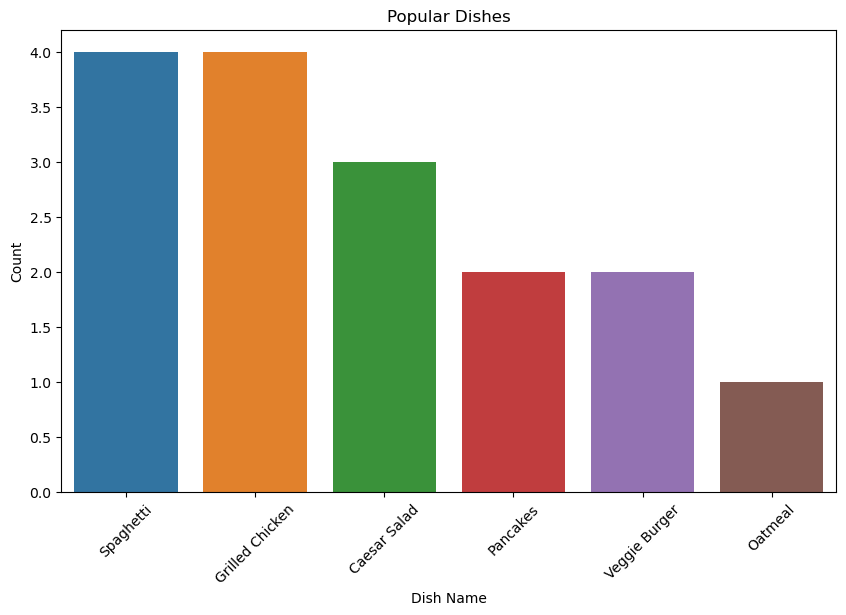

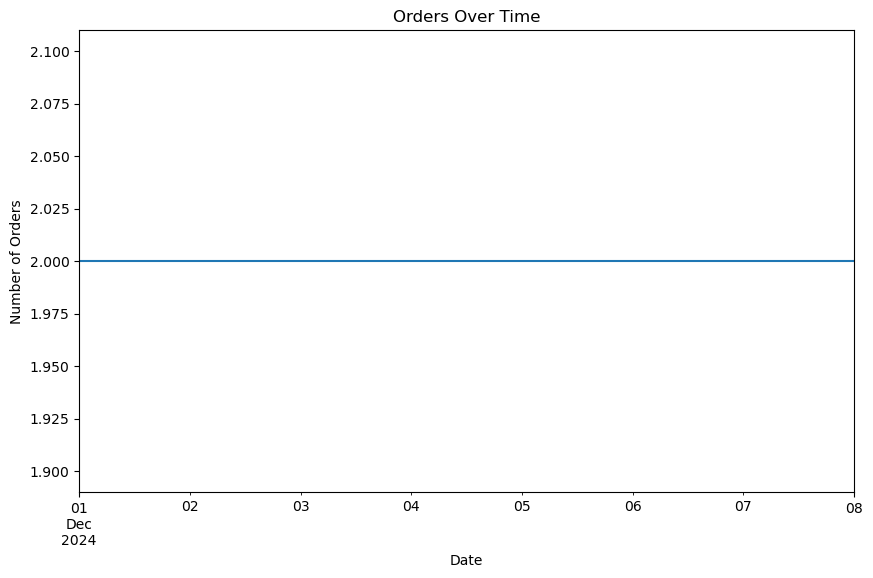

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title('Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Orders over time
final_data['Order Date'] = pd.to_datetime(final_data['Order Date'])
orders_over_time = final_data.groupby('Order Date')['Order ID'].count()

plt.figure(figsize=(10, 6))
orders_over_time.plot(kind='line', title='Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.show()


**Popular Dishes Insights**:
Spaghetti and Grilled Chicken are the most popular, while Oatmeal is the least preferred.

**Ordeer over time Insights**:
The Number of order remains constant, suggesting uniform demand or incomplete date.

### **Key Insights**:  
1. **Popular Dishes**: Spaghetti and Grilled Chicken are top favorites, while Oatmeal is least preferred.  
2. **Consistent Orders**: Order numbers remain constant over time, suggesting either uniform demand or limited data.  
3. **Meal Preferences**: Dinner dominates both cooking sessions and orders, followed by lunch.  
4. **High Session Ratings**: Users rate sessions highly (4.0–4.9), showing satisfaction with the experience.  
5. **Engaged Users**: Users like Alice and Bob frequently order and participate in cooking sessions, reflecting high engagement.

---

### **Recommendations**:  
1. **Focus Promotions**: Highlight Spaghetti and Grilled Chicken in marketing campaigns to attract more users.  
2. **Improve Low-Performing Dishes**: Redesign or reintroduce unpopular dishes like Oatmeal to boost appeal.  
3. **Encourage Evening Engagement**: Tailor offers and discounts for dinner-related sessions and orders.  
4. **Boost User Engagement**: Introduce rewards for frequent users like Alice and Bob to encourage loyalty.  
5. **Investigate Order Consistency**: Analyze order trends further to confirm whether consistent demand is real or due to data limitations.  

In [30]:
# Save cleaned datasets to new Excel files
final_data.to_excel('cleaned_data.xlsx', index=False)

In [34]:
import pandas as pd

# Assuming you have cleaned DataFrames: user_details_cleaned, cooking_sessions_cleaned, and order_details_cleaned
with pd.ExcelWriter('cleaned_data.xlsx') as writer:
    user_details.to_excel(writer, sheet_name='UserDetails', index=False)
    cooking_sessions.to_excel(writer, sheet_name='CookingSessions', index=False)
    order_details.to_excel(writer, sheet_name='OrderDetails', index=False)